# Level3:単語の共起行列から特徴ベクトルを生成せよ。

### 必要なモジュールをインポートする

In [2]:
import sklearn.feature_extraction.text as fe_text
import os
import nltk
from nltk.tokenize import wordpunct_tokenize, sent_tokenize
import numpy as np
import glob
import scipy.spatial.distance as distance
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 実際のデータを使って実行

In [5]:
List_Data_NL=[]
for i in range(1,14):
    List_Data_NL = glob.glob( "./data/*.html")

In [6]:
DataPath = "./data/kadai"
sentence = ""
for i in range(1,len(List_Data_NL)+1):
    with open(DataPath +str(i) + ".html" ) as f:
        r = f.read()
        sentence += r

テキストに対する**前処理**

In [7]:
def preprocess(text):
   
    text = text.lower()
    text = text.replace('.', ' .')
    text = text.replace('"', '')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word


In [11]:
corpus, word_to_id, id_to_word = preprocess(sentence)
vocab_size = len(word_to_id)
#print(corpus)
#print(word_to_id)
#print(id_to_word)

**共起行列**を作成。

In [12]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx - i
            right_idx = idx + i
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    return co_matrix

In [15]:
def cos_sim(vector):
    vectors = np.array(vector)
    ListVector=[]
    for i in range(len(vectors)):
        temp=[]
        for j in range(len(vectors)):
            temp.append(np.dot(vectors[i], vectors[j]) / (np.linalg.norm(vectors[i]) * np.linalg.norm(vectors[j])))
        ListVector.append(temp)
    return ListVector

In [13]:
co_matrix = create_co_matrix(corpus, vocab_size, window_size=3)
df = pd.DataFrame(co_matrix, index=word_to_id.keys(), columns=word_to_id.keys())
df

,<!--,saved,from,url=(0035)https://www,.nltk,.org/book/ch00,.html,--> <html,xmlns=http://www,.w3,...,serve the,"society, and",pathway,riches of,.</p> <p><em>but,present:,hacking!</em></p> <!--,name=noun_phrase_index_term> <p,name=noun_phrase_index_term>updated,acst</p> </div> </div> </div> </body></html>
\n<!--,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
saved,1,0,13,12,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
from,1,13,2,12,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
url=(0035)https://www,1,12,12,0,12,1,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.nltk,0,13,13,12,0,5,12,12,0,0,...,0,0,0,0,0,0,0,0,0,0
.org/book/ch00,0,0,1,1,5,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
.html,0,0,0,12,12,1,0,12,12,12,...,0,0,0,0,0,0,0,0,0,0
-->\n<html,0,0,0,0,12,1,12,0,12,12,...,0,0,0,0,0,0,0,0,0,0
xmlns=http://www,0,0,0,0,0,1,12,12,0,12,...,0,0,0,0,0,0,0,0,0,0
.w3,0,1,0,0,0,0,12,12,12,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df[['natural', 'language', 'text', 'count', 'processing']].T

,<!--,saved,from,url=(0035)https://www,.nltk,.org/book/ch00,.html,--> <html,xmlns=http://www,.w3,...,serve the,"society, and",pathway,riches of,.</p> <p><em>but,present:,hacking!</em></p> <!--,name=noun_phrase_index_term> <p,name=noun_phrase_index_term>updated,acst</p> </div> </div> </div> </body></html>
natural,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
language,0,0,20,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
text,0,0,35,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
processing,0,0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
vectors = df[['natural', 'language', 'text', 'count', 'processing']].T.values

cos_similarity_matrix = np.array(cos_sim(vectors))
cos_similarity_matrix

array([[1.        , 0.49939095, 0.42816322, 0.38012487, 0.76305433],
       [0.49939095, 1.        , 0.76750643, 0.65795695, 0.66059916],
       [0.42816322, 0.76750643, 1.        , 0.77048501, 0.60030137],
       [0.38012487, 0.65795695, 0.77048501, 1.        , 0.51786416],
       [0.76305433, 0.66059916, 0.60030137, 0.51786416, 1.        ]])

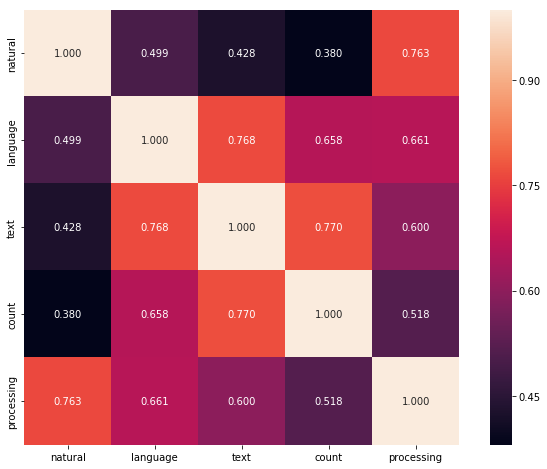

In [17]:
fig, ax = plt.subplots(figsize=(11,8))
sns.heatmap(cos_similarity_matrix, annot=True, fmt='.3f', square=True, ax=ax,
           xticklabels=['natural', 'language', 'text', 'count', 'processing'],
           yticklabels=['natural', 'language', 'text', 'count', 'processing'])
ax.set_ylim(5, 0)
plt.yticks(va="center")
plt.show()

In [18]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

In [19]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    """コサイン類似度Top5を出力。

    :param query(str): クエリ。
    :param word_to_id(dict): 単語をkeyとして、idを参照する辞書。
    :param id_to_word(dict): idをkeyとして、単語を参照する辞書。
    :param word_matrix: 共起行列。
    :param top(int): 上位何件まで表示させるか。
    :return: なし。
    """
    if query not in word_to_id:
        print('%s is not found' % query)
        return

    print('[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    vocab_size = len(word_to_id)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], np.round(similarity[i],3)))
        count += 1
        if count >= top:
            return

In [20]:
print('\n# most_similar() with co_matrix')
user_query = "pandas"
most_similar(user_query, word_to_id, id_to_word, co_matrix)


# most_similar() with co_matrix
pandas is not found


### 単語についてマトリックス表記で単語間類似度（コサイン類似度）を記せ

In [21]:
print("\n# most_similar() with co_matrix")
user_word = "natural"
most_similar(user_word,word_to_id, id_to_word, co_matrix)


# most_similar() with co_matrix
[query] natural
 processing: 0.763
 technologies: 0.714
 computation
by: 0.673
 work,
and: 0.648
 rotokas: 0.621
